In [96]:
import pandas as pd
import datetime as dt
from game_log import load_current_line
import matplotlib.pyplot as plt

today = dt.datetime.today()
year = today.year
month = today.month
day = today.day
today_str = f'{year}_{month}_{day}'

pp_path = f'Lines/pp/pp_{today_str}.csv'
unabated_path = f'Lines/unabated/unabated_{today_str}.csv'
dog_path = f'Lines/dog/doglines_{today.month}_{today.day}.csv'

pp_lines = load_current_line(pp_path,'prop_id','time')
unabated = load_current_line(unabated_path,'prop_id','time')
#dog_lines = pd.read_csv(dog_path,index_col=0)

In [97]:
#pp_lines['date'] = pp_lines["date"].apply(lambda x: pd.to_datetime(x,utc=True))
#unabated["event_time"].apply(lambda x: pd.to_datetime(x,utc=True))

In [98]:
nba = pp_lines.loc[pp_lines.league_id==7]
combined = unabated.merge(pp_lines[['player','line','stat']],how='inner', on=['player','stat'],suffixes=['_u','_pp'])
combined

,prop_id,player,player_id,line_u,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time,line_pp
0,00008be1-8,Luka Doncic,93,8.5,TRB,3,2023-11-06 18:00:00-06:00,ORL,DAL,1,0.545984,0.454016,9.464639,2023-11-06 15:18:00,9.5
1,00008be1-8,Luka Doncic,93,9.5,TRB,3,2023-11-06 18:00:00-06:00,ORL,DAL,9,0.480482,0.519518,9.464639,2023-11-06 15:18:00,9.5
2,aa6b47b1-d,Dejounte Murray,42901,10.5,TRB+AST,3,2023-11-06 19:00:00-06:00,OKC,ATL,7,0.514834,0.485166,10.835578,2023-11-06 15:18:00,11.0
3,aa6b47b1-d,Dejounte Murray,42901,11.0,TRB+AST,3,2023-11-06 19:00:00-06:00,OKC,ATL,1,0.500000,0.500000,10.835578,2023-11-06 15:18:00,11.0
4,abbe0fa0-3,Quentin Grimes,43475,11.5,PTS+TRB,3,2023-11-06 18:30:00-06:00,NYK,LAC,8,0.484567,0.515433,11.535781,2023-11-06 15:18:00,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1636,56b5c374-9,Ausar Thompson,417201,3.5,AST,3,2023-11-06 18:00:00-06:00,DET,GSW,14,0.498958,0.501042,3.664883,2023-11-06 15:18:00,3.5
1637,571ae3d0-5,Obi Toppin,43307,0.5,3P,3,2023-11-06 18:00:00-06:00,IND,SAS,7,0.493284,0.506716,0.678408,2023-11-06 15:18:00,0.5
1638,573e696d-a,Trae Young,5334,12.5,TRB+AST,3,2023-11-06 19:00:00-06:00,OKC,ATL,5,0.529140,0.470860,13.049049,2023-11-06 15:18:00,13.0
1639,573e696d-a,Trae Young,5334,13.0,TRB+AST,3,2023-11-06 19:00:00-06:00,OKC,ATL,2,0.500000,0.500000,13.049049,2023-11-06 15:18:00,13.0


In [99]:
combined = combined[['prop_id', 'player','line_u','line_pp', 'player_id', 'stat', 
       'event_time', 'opp', 'Team', 'count', 'over_prob', 'under_prob', 'pred',]]

In [100]:
combined.loc[combined.player=='Scottie Barnes']

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred


In [101]:
combined.loc[combined.line_u == combined.line_pp].sort_values(by='over_prob').head(15)

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
568,ff0924b0-8,Garrett Wilson,5.5,5.5,34250,Receptions,2023-11-06 19:15:00-06:00,NYJ,LAC,16,0.457747,0.542253,5.411343
9,ac5f5743-6,Lauri Markkanen,8.5,8.5,43502,TRB,2023-11-06 19:00:00-06:00,CHI,UTA,14,0.465966,0.534034,8.408631
1359,6a4d1441-4,Daniel Gafford,8.5,8.5,241452,PTS,2023-11-06 18:00:00-06:00,PHI,WAS,9,0.468149,0.531851,8.442419
1396,83f53c32-4,Josh Giddey,5.5,5.5,42679,AST,2023-11-06 19:00:00-06:00,OKC,ATL,13,0.468790,0.531210,5.565200
1181,1aa41830-5,Chet Holmgren,7.5,7.5,242856,TRB,2023-11-06 19:00:00-06:00,OKC,ATL,15,0.469819,0.530181,7.467834
1382,7dd61bf6-3,Zach LaVine,2.5,2.5,42799,3P,2023-11-06 19:00:00-06:00,CHI,UTA,14,0.470142,0.529858,2.552269
1122,002d9b8f-c,Jalen Duren,11.5,11.5,43165,TRB,2023-11-06 18:00:00-06:00,DET,GSW,14,0.470630,0.529370,11.426450
401,98dcc5fa-8,Austin Reaves,1.5,1.5,42647,3P,2023-11-06 18:30:00-06:00,MIA,LAL,14,0.471950,0.528050,1.588382
589,f3126a64-d,Jordan Poole,2.5,2.5,43093,TRB,2023-11-06 18:00:00-06:00,PHI,WAS,13,0.471979,0.528021,2.560092
821,d556561b-d,Chet Holmgren,2.5,2.5,242856,AST,2023-11-06 19:00:00-06:00,OKC,ATL,14,0.472166,0.527834,2.560810


In [102]:
combined.loc[combined.line_u == combined.line_pp].sort_values(by='over_prob').tail(15)

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred
1510,42978818-7,Tyson Walker,15.5,15.5,245650,PTS,2023-11-06 19:30:00-06:00,MSU,JMU,1,0.525269,0.474731,15.918882
69,a3b72565-1,Malik Monk,15.5,15.5,43333,PTS,2023-11-06 19:00:00-06:00,HOU,SAC,6,0.525390,0.474610,16.044044
33,acd933ce-b,Austin Reaves,3.5,3.5,42647,AST,2023-11-06 18:30:00-06:00,MIA,LAL,15,0.525736,0.474264,3.793843
728,c9b0e87f-1,Jaden Akins,1.5,1.5,286933,3P,2023-11-06 19:30:00-06:00,MSU,JMU,1,0.526118,0.473882,1.761057
1243,172e9935-4,Dejounte Murray,1.5,1.5,42901,3P,2023-11-06 19:00:00-06:00,OKC,ATL,14,0.526537,0.473463,1.762432
994,3c3c9461-b,Alperen Sengun,9.5,9.5,43037,TRB,2023-11-06 19:00:00-06:00,HOU,SAC,15,0.526870,0.473130,9.878091
838,d8c4ab80-3,Keenan Allen,6.5,6.5,38673,Receptions,2023-11-06 19:15:00-06:00,NYJ,LAC,17,0.527153,0.472847,6.844199
377,93629419-a,Deni Avdija,0.5,0.5,43250,STL,2023-11-06 18:00:00-06:00,PHI,WAS,11,0.527379,0.472621,0.748010
1242,199d99eb-4,Jalen Green,3.5,3.5,42535,TRB,2023-11-06 19:00:00-06:00,HOU,SAC,13,0.528358,0.471642,3.806569
1529,41e9147d-6,Tyus Jones,5.5,5.5,109,AST,2023-11-06 18:00:00-06:00,PHI,WAS,15,0.529399,0.470601,5.844773


In [103]:
combined.loc[combined.player=='Tyreek Hill']

,prop_id,player,line_u,line_pp,player_id,stat,event_time,opp,Team,count,over_prob,under_prob,pred


In [104]:
test = pd.read_csv('Lines/unabated/unabated_2023_11_3.csv',index_col=0)
test = test.sort_values(by='time')
test

,prop_id,player,player_id,line,stat,league_id,event_time,opp,Team,count,over_prob,under_prob,pred,time
2750,fffe9131-6,Montrell Johnson,109642,60.5,Rush Yards,2,2023-11-04 11:00:00-05:00,FLA,ARK,4,0.500000,0.500000,59.757026,2023-11-03 09:53:00
919,53881a26-b,Audric Estime,159596,79.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,3,0.501288,0.498712,77.141839,2023-11-03 09:53:00
918,53881a26-b,Audric Estime,159596,75.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,3,0.500000,0.500000,77.141839,2023-11-03 09:53:00
917,53881a26-b,Audric Estime,159596,73.5,Rush Yards,2,2023-11-04 11:00:00-05:00,CLE,ND,2,0.500000,0.500000,77.141839,2023-11-03 09:53:00
916,53614359-b,Jordan Hicks,38906,8.5,Tackles and Assists,1,2023-11-05 12:00:00-06:00,ATL,MIN,4,0.524243,0.475757,8.846926,2023-11-03 09:53:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3399,adf4b362-9,Delon Wright,43247,3.0,AST,3,2023-11-03 19:00:00-05:00,MIA,WAS,1,0.500000,0.500000,3.405688,2023-11-03 21:29:00
3400,adf4b362-9,Delon Wright,43247,3.5,AST,3,2023-11-03 19:00:00-05:00,MIA,WAS,6,0.451243,0.548757,3.405688,2023-11-03 21:29:00
3401,adf79b7c-5,Damien Alford,222007,1.5,Receptions,2,2023-11-03 18:30:00-05:00,SYR,BC,1,0.500000,0.500000,3.005295,2023-11-03 21:29:00
3394,ad9b323f-3,Kyren Lacy,173609,28.5,Receiving Yards,2,2023-11-04 18:45:00-05:00,BAMA,LSU,3,0.477343,0.522657,30.102583,2023-11-03 21:29:00


In [105]:
result = test.groupby(['player', 'stat','line']).apply(lambda x: pd.Series({
    'pred': x.sort_values(by='time')['pred'].tolist(),
    'time': x.sort_values(by='time')['time'].tolist()
}))

# Reset the index of the resulting DataFrame
result = result.reset_index()
result

,player,stat,line,pred,time
0,A.J. Brown,Longest Reception,27.5,"[27.62216454693972, 27.602433468943524, 27.625...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
1,A.J. Brown,Receiving Yards,80.5,"[81.22724283097502, 81.96004492733793, 82.5785...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
2,A.J. Brown,Receiving Yards,81.5,"[81.22724283097502, 81.96004492733793, 82.5785...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3,A.J. Brown,Receiving Yards,82.5,"[81.22724283097502, 81.96004492733793, 82.5785...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
4,A.J. Brown,Receiving Yards,83.5,"[81.96004492733793, 82.57853497332516, 82.3522...","[2023-11-03 11:29:00, 2023-11-03 12:29:00, 202..."
...,...,...,...,...,...
6417,Zion Williamson,PTS+AST,29.5,"[29.67929361770033, 29.67929361770033]","[2023-11-03 20:29:00, 2023-11-03 21:29:00]"
6418,Zion Williamson,PTS+TRB,31.5,"[31.680131739011195, 31.680131739011195]","[2023-11-03 20:29:00, 2023-11-03 21:29:00]"
6419,Zion Williamson,PTS+TRB+AST,36.5,"[36.68132825955937, 36.68132825955937]","[2023-11-03 20:29:00, 2023-11-03 21:29:00]"
6420,Zion Williamson,TRB,6.5,"[6.66741358059197, 6.66741358059197]","[2023-11-03 20:29:00, 2023-11-03 21:29:00]"


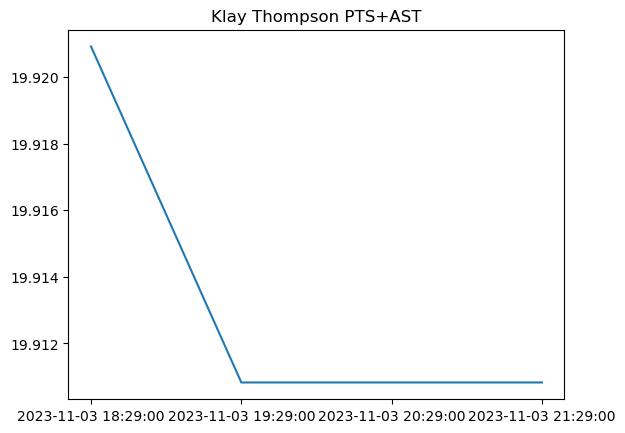

In [106]:

def plot_line_movement(df,idx):
    lines = df.pred.iloc[idx]
    times = df.time.iloc[idx]
    plt.plot(times,lines)
    plt.title(label=(df.loc[idx,'player'] + ' ' + df.loc[idx,'stat']))
    plt.show()
plot_line_movement(result,4068)

In [110]:
result.loc[result.player=='Jimmy Butler']

,player,stat,line,pred,time
3262,Jimmy Butler,3P,0.5,"[0.5697230477123248, 0.5684723588347824, 0.571...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3263,Jimmy Butler,3P,1.5,"[0.7164834873632889, 0.7164834873632889, 0.716...","[2023-11-03 19:29:00, 2023-11-03 20:29:00, 202..."
3264,Jimmy Butler,AST,1.5,[5.245807948877546],[2023-11-03 21:29:00]
3265,Jimmy Butler,AST,2.5,[5.312577368854106],[2023-11-03 20:29:00]
3266,Jimmy Butler,AST,4.5,"[5.1496438809704825, 5.154052442151494, 5.1540...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3267,Jimmy Butler,AST,5.0,"[5.1496438809704825, 5.154052442151494, 5.1540...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3268,Jimmy Butler,AST,5.5,"[5.1496438809704825, 5.154052442151494, 5.1540...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3269,Jimmy Butler,BLK,0.5,"[0.5349935859034363, 0.5235860110608495, 0.513...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3270,Jimmy Butler,BLK+STL,1.5,"[2.0477599797799937, 2.038927218493239, 2.0389...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."
3271,Jimmy Butler,PTS,19.5,"[19.67496491850289, 19.67529636999805, 19.6809...","[2023-11-03 09:53:00, 2023-11-03 11:29:00, 202..."


In [108]:
result.iloc[1760:1770]

,player,stat,line,pred,time
1760,Delon Wright,BLK,0.5,"[0.2846867877113701, 0.2755685820291675, 0.275...","[2023-11-03 13:29:00, 2023-11-03 14:29:00, 202..."
1761,Delon Wright,BLK+STL,1.5,"[1.3330378727081498, 1.319787814007313, 1.3197...","[2023-11-03 13:29:00, 2023-11-03 14:29:00, 202..."
1762,Delon Wright,PTS,3.5,"[4.575515406026301, 4.575515406026301]","[2023-11-03 20:29:00, 2023-11-03 21:29:00]"
1763,Delon Wright,PTS,4.5,"[4.721327090706743, 4.721922939112402, 4.72192...","[2023-11-03 13:29:00, 2023-11-03 14:29:00, 202..."
1764,Delon Wright,PTS,5.5,[4.8981837670598924],[2023-11-03 19:29:00]
1765,Delon Wright,PTS+AST,8.5,"[8.631493692543943, 8.643005984032731, 8.64300...","[2023-11-03 13:29:00, 2023-11-03 14:29:00, 202..."
1766,Delon Wright,PTS+TRB,7.5,"[7.769409697844928, 7.781987991441061, 7.78198...","[2023-11-03 13:29:00, 2023-11-03 14:29:00, 202..."
1767,Delon Wright,PTS+TRB+AST,10.5,"[11.348246257489356, 11.348246257489356]","[2023-11-03 20:29:00, 2023-11-03 21:29:00]"
1768,Delon Wright,PTS+TRB+AST,11.5,"[11.666609705727254, 11.666609705727254, 11.66...","[2023-11-03 13:29:00, 2023-11-03 14:29:00, 202..."
1769,Delon Wright,PTS+TRB+AST,12.5,[11.763523300913874],[2023-11-03 19:29:00]


In [109]:
x.columns

NameError: name 'x' is not defined